In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import sklearn

In [2]:
sklearn.__version__

'0.24.1'

In [3]:
from platform import python_version

print(python_version())

3.8.8


# Config

In [4]:
#directory = os.path.dirname(os.path.dirname(os.getcwd()))


In [5]:
#plot_dir = directory +'/aerosol_results/invertible_model_phase_noise_small_drop0/plots/hyperparameter_scans'
#plot_dir = directory+'/aerosol_results/simulated_data/invertible_model3/plots/hyperparameter_scans'
#if not os.path.exists(plot_dir):
#    os.makedirs(plot_dir)

In [6]:
#result_dir = directory +'/aerosol_results/simulated_data/invertible_model3'

In [7]:
#model_dir = directory +'/aerosol_results/simulated_data/models_overview/models3'
#if not os.path.exists(model_dir):
#    os.makedirs(model_dir)

In [8]:
directory = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/'
directory1 = directory + 'real_meas_scan_532/version1'
#%store -r directory1




In [9]:
plot_dir = directory1 + '/plots/hyperparameter_scans_new'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
result_dir = directory1
model_dir = directory1 +'/model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [10]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1/model'

# Load data

In [11]:
df = pd.read_csv(f'{result_dir}/results.csv', index_col=0)


In [12]:
config_columns = [col for col in df.columns if col.startswith('config/')]
config_column_labels = {col: col.replace('config/', '') for col in config_columns if col != 'datafile'}

In [13]:
df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id',
       'config/activation_function_last_l

In [14]:
df['r2_val']

0     0.958666
1     0.978066
2     0.949827
3     0.957462
4     0.954635
5     0.948601
6     0.959017
7     0.959133
8     0.964685
9     0.945826
10    0.951023
11    0.950584
12    0.953839
13    0.943336
14    0.961071
15    0.941881
16    0.948847
17    0.928167
18    0.960270
19    0.959391
20    0.935305
21    0.956961
22    0.962278
23    0.959365
24    0.936921
25    0.953710
26    0.950539
Name: r2_val, dtype: float64

In [15]:
df['r2_val_dvar']

0     0.873904
1     0.993074
2     0.888460
3     0.988675
4     0.902107
5     0.965198
6     0.962895
7     0.895227
8     0.901316
9     0.957054
10    0.896503
11    0.886072
12    0.889340
13    0.863275
14    0.884770
15    0.863790
16    0.901891
17    0.957161
18    0.895334
19    0.889603
20    0.902801
21    0.878182
22    0.855831
23    0.959526
24    0.965394
25    0.887443
26    0.951982
Name: r2_val_dvar, dtype: float64

# Plot

## Generalisation of $R^2$

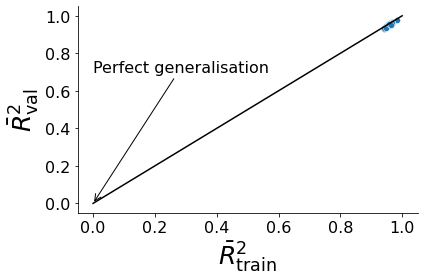

In [16]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_train', y='r2_val', ax=ax)
ax.plot([0, 1.], [0, 1.], color='black')
ax.annotate(xy=(0, 0),
            xytext=(0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_qoi_generalisation.jpg')

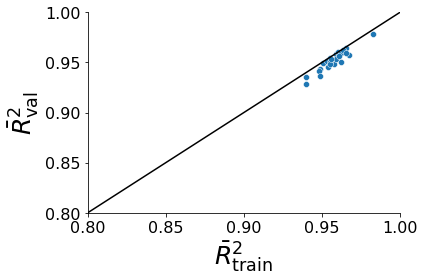

In [17]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_train', y='r2_val', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
#ax.annotate(xy=(0.8, 0.8),
#            xytext=(0.1, 0.8),
#            text='Perfect generalisation',
#            fontsize=16,
#            arrowprops={
#                'arrowstyle': '->'
#            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0.8, 1.])
ax.set_ylim([0.8, 1.])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_qoi_generalisation_closeup.jpg')

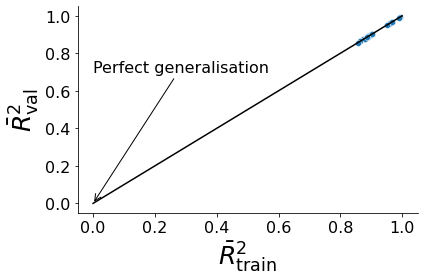

In [18]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_train_dvar', y='r2_val_dvar', ax=ax)
ax.plot([0, 1.], [0, 1.], color='black')
ax.annotate(xy=(0, 0),
            xytext=(0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_dvar_generalisation.jpg')

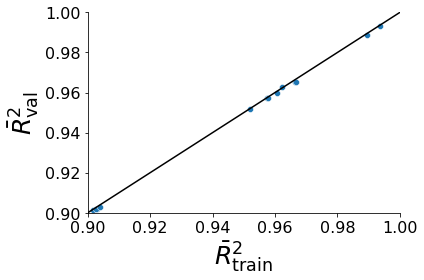

In [19]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_train_dvar', y='r2_val_dvar', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
#ax.annotate(xy=(0.8, 0.8),
#            xytext=(0.1, 0.8),
#            text='Perfect generalisation',
#            fontsize=16,
#            arrowprops={
#                'arrowstyle': '->'
#            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0.9, 1.])
ax.set_ylim([0.9, 1.])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_dvar_generalisation_closeup.jpg')

## Relationship between $R^2$ and rel. error

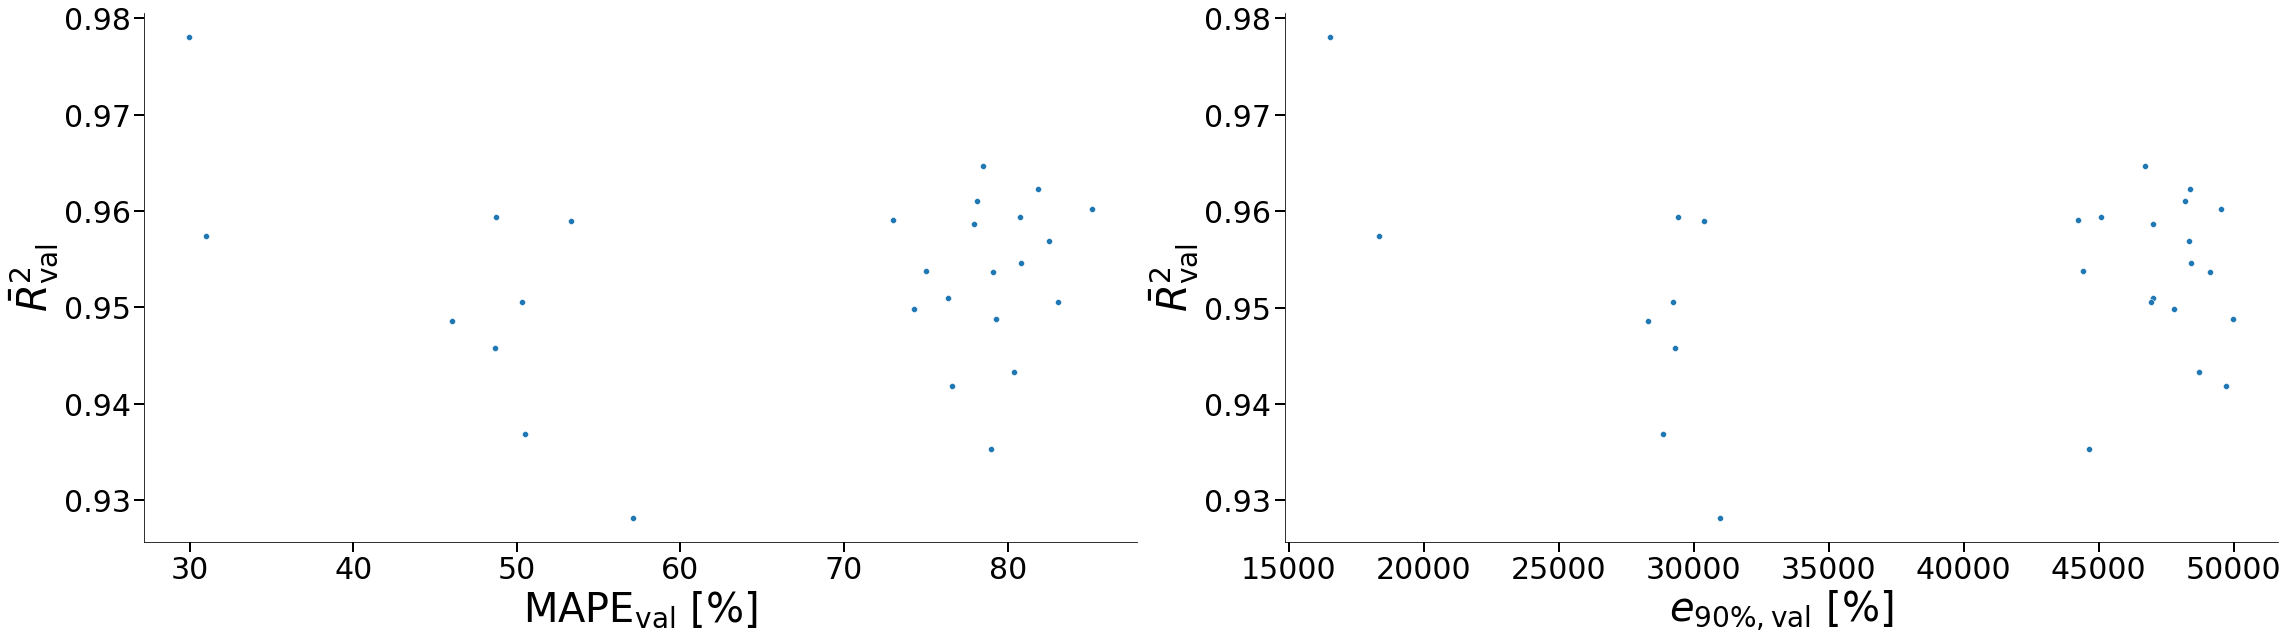

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(32, 9))

ax = axes[0]
sns.scatterplot(data=df, x='MAPE_val', y='r2_adj_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\mathrm{MAPE}_\mathrm{val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

ax = axes[1]
sns.scatterplot(data=df, x='90_percentile_max_error_val', y='r2_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$e_\mathrm{90\%, val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

for ax in axes:
    ax.tick_params(labelsize=30, width=2, length=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_vs_rel_errors.jpg')

## Execution time vs. batch size

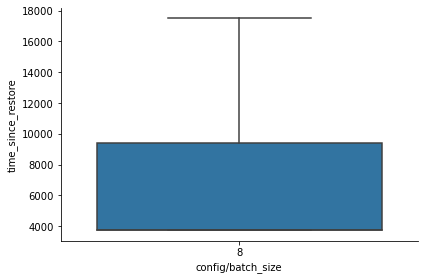

In [21]:
fig, ax = plt.subplots()

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/time_vs_batch_size')

## Dependence on the parameters

In [22]:
config_columns

['config/activation_function_last_layer',
 'config/activation_functions_inbetween',
 'config/batch_size',
 'config/datafile',
 'config/epochs',
 'config/learning_rate',
 'config/n_blocks',
 'config/n_depth',
 'config/n_width',
 'config/nominal_dimension',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/weight_artificial',
 'config/weight_reconstruction',
 'config/weight_x',
 'config/weight_y',
 'config/weight_z',
 'config/y_noise']

In [23]:
config_columns_changing = ['config/weight_reconstruction','config/weight_x','config/weight_z']
config_columns_changing = config_columns

In [24]:
to_plot = df[config_columns_changing + ['r2_val_dvar']].rename(columns=config_column_labels)

<ipython-input-25-4ae40c6ed3e8>:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
<ipython-input-25-4ae40c6ed3e8>:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
<ipython-input-25-4ae40c6ed3e8>:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


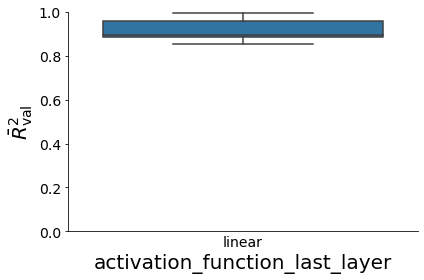

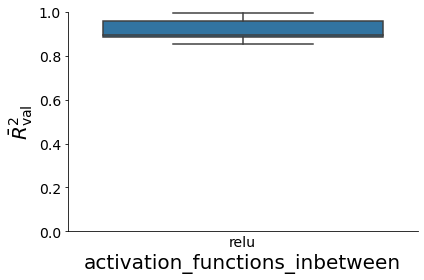

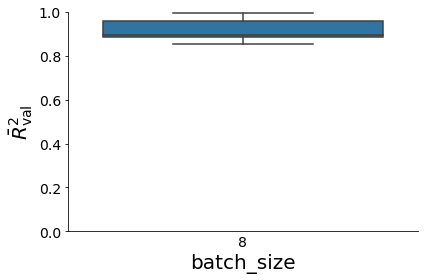

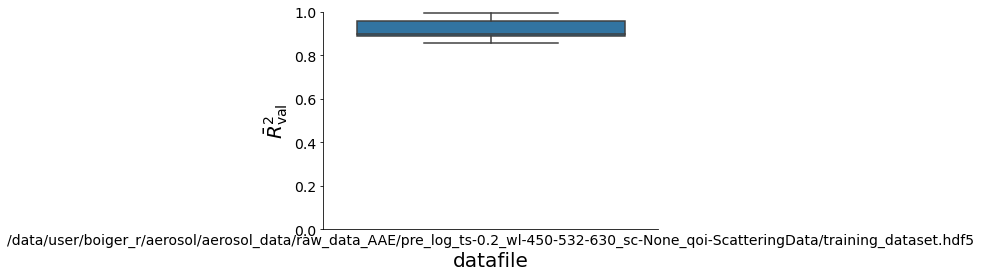

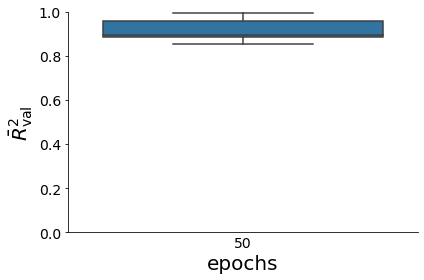

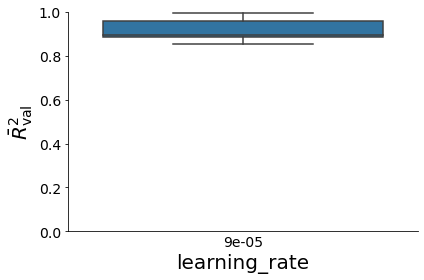

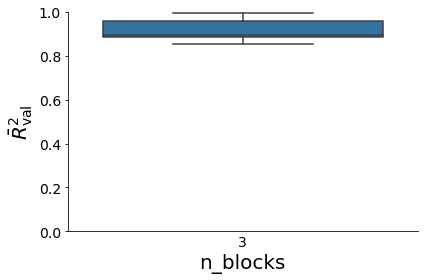

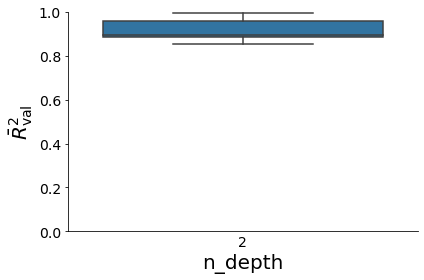

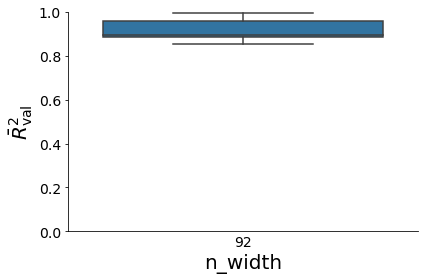

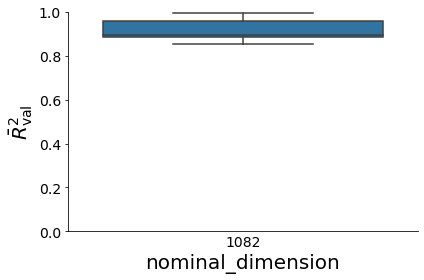

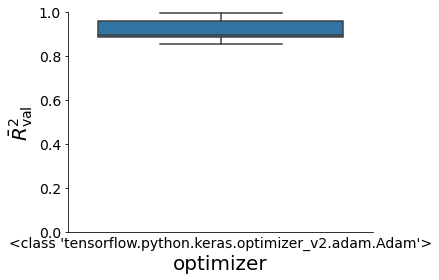

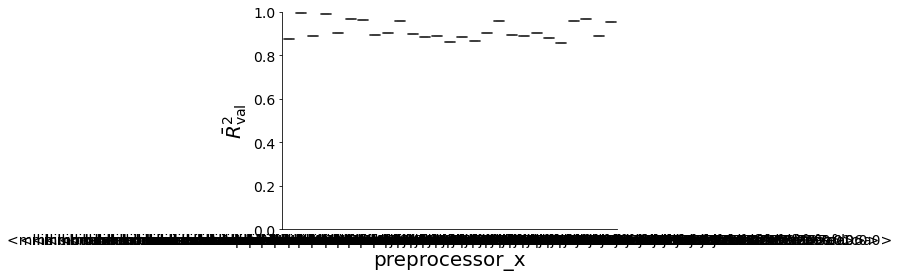

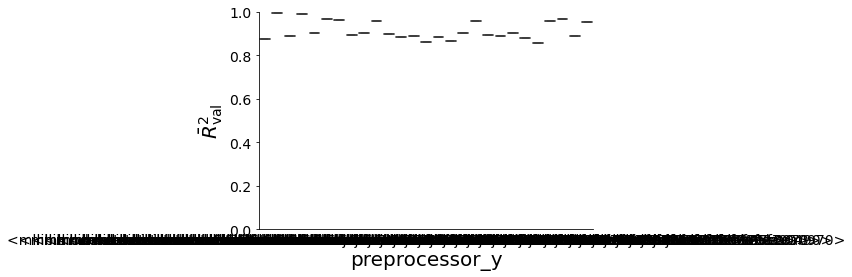

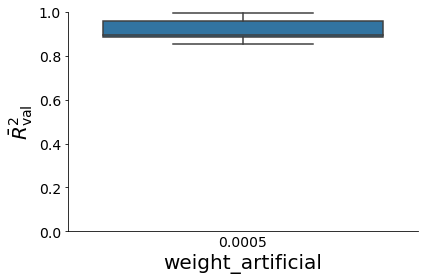

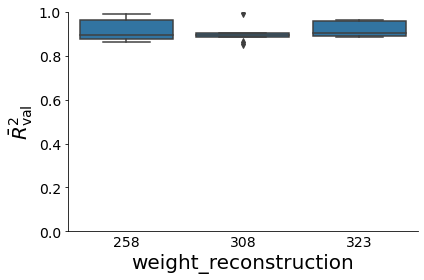

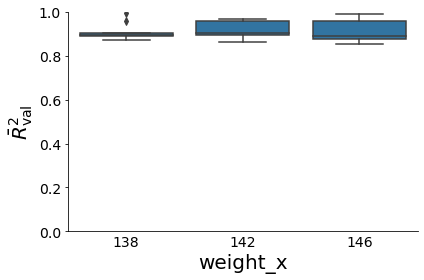

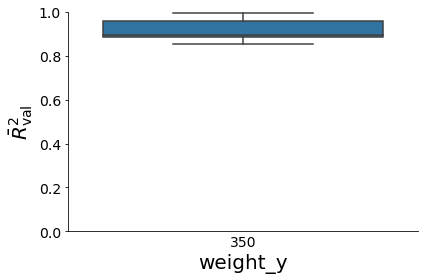

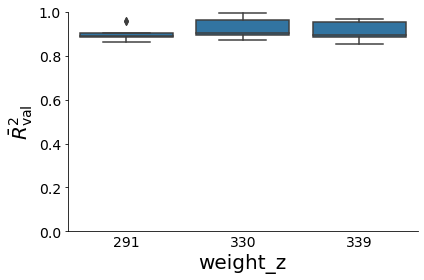

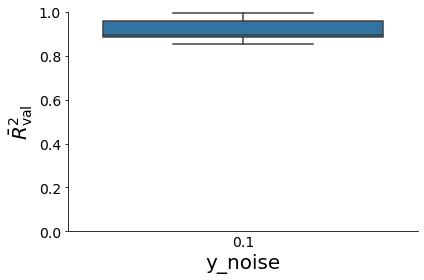

In [25]:
for param in to_plot.columns:
    if param == 'r2_val_dvar':
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y='r2_val_dvar', color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim([0., 1.])
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

# Best configs

In [26]:
df['config/datafile'][0]

'/data/user/boiger_r/aerosol/aerosol_data/raw_data_AAE/pre_log_ts-0.2_wl-450-532-630_sc-None_qoi-ScatteringData/training_dataset.hdf5'

In [27]:
df.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id',
       'config/activation_function_last_l

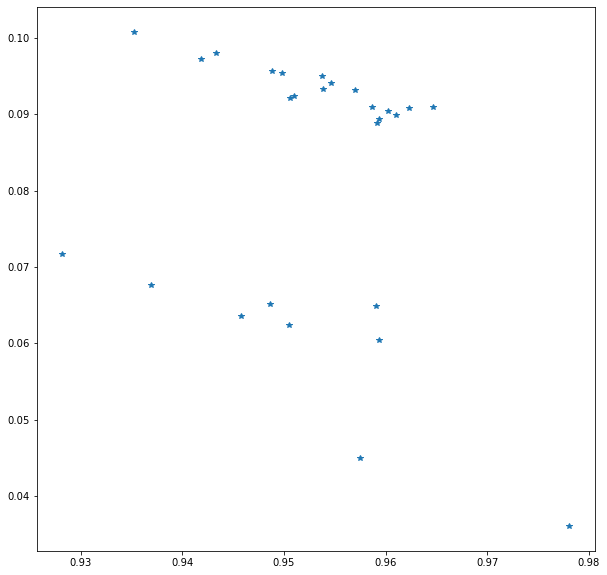

In [28]:
plt.figure(figsize = (10,10))
plt.plot(df['r2_val'],df['MAE_val'],'*')


In [88]:
best_config = df.sort_values('r2_val_dvar', ascending=False).iloc[0,:]


In [89]:
df.sort_values('r2_val_dvar', ascending=False).iloc[1,:]


MAE_train                                                   0.042086
MAE_val                                                     0.044999
MAPE_train                                                  34.57305
MAPE_val                                                   30.989909
MSE_train                                                   0.075802
                                         ...                        
config/weight_x                                                  146
config/weight_y                                                  350
config/weight_z                                                  330
config/y_noise                                                   0.1
logdir             /data/project/general/aerosolretriev/aerosol_r...
Name: 3, Length: 64, dtype: object

In [30]:
df.sort_values('r2_val', ascending=False)[config_columns_changing + ['r2_train_dvar','r2_val_dvar','r2_train','r2_val' ,'MAE_train','MAE_val']].rename(columns=config_column_labels).head(3)

activation_function_last_layer activation_functions_inbetween  batch_size  \
1                          linear                           relu           8   
8                          linear                           relu           8   
22                         linear                           relu           8   

                                             datafile  epochs  learning_rate  \
1   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
8   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
22  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   

    n_blocks  n_depth  n_width  nominal_dimension  ... weight_x weight_y  \
1          3        2       92               1082  ...      138      350   
8          3        2       92               1082  ...      142      350   
22         3        2       92               1082  ...      146      350   

   weight_z  y_noise  r2_train_dvar  r2_val_dvar  r2_train    r2_val  \
1       330      0.1       0.993500     0.993074  0.982545  0.978066   
8       330      0.1       0.901572     0.901316  0.965609  0.964685   
22      339      0.1       0.856206     0.855831  0.963363  0.962278   

    MAE_train   MAE_val  
1    0.034939  0.036061  
8    0.090544  0.090967  
22   0.090443  0.090832  

[3 rows x 25 columns]

In [31]:
df.sort_values('r2_val_dvar', ascending=False)[config_columns_changing + ['r2_train_dvar','r2_val_dvar','r2_train','r2_val' ,'MAE_train','MAE_val']].rename(columns=config_column_labels).head(20)

activation_function_last_layer activation_functions_inbetween  batch_size  \
1                          linear                           relu           8   
3                          linear                           relu           8   
24                         linear                           relu           8   
5                          linear                           relu           8   
6                          linear                           relu           8   
23                         linear                           relu           8   
17                         linear                           relu           8   
9                          linear                           relu           8   
26                         linear                           relu           8   
20                         linear                           relu           8   
4                          linear                           relu           8   
16                         linear                           relu           8   
8                          linear                           relu           8   
10                         linear                           relu           8   
18                         linear                           relu           8   
7                          linear                           relu           8   
19                         linear                           relu           8   
12                         linear                           relu           8   
2                          linear                           relu           8   
25                         linear                           relu           8   

                                             datafile  epochs  learning_rate  \
1   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
3   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
24  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
5   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
6   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
23  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
17  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
9   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
26  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
20  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
4   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
16  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
8   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
10  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
18  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
7   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
19  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
12  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
2   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
25  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   

    n_blocks  n_depth  n_width  nominal_dimension  ... weight_x weight_y  \
1          3        2       92               1082  ...      138      350   
3          3        2       92               1082  ...      146      350   
24         3        2       92               1082  ...      142      350   
5          3        2       92               1082  ...      146      350   
6          3        2       92               1082  ...      142      350   
23         3        2       92               1082  ...      146      350   
17         3        2       92               1082  ...      142      350   
9          3        2       92   

In [90]:
best_config

MAE_train                                                   0.064437
MAE_val                                                      0.06764
MAPE_train                                                 59.938552
MAPE_val                                                   50.468551
MSE_train                                                   0.113008
                                         ...                        
config/weight_x                                                  142
config/weight_y                                                  350
config/weight_z                                                  339
config/y_noise                                                   0.1
logdir             /data/project/general/aerosolretriev/aerosol_r...
Name: 24, Length: 64, dtype: object

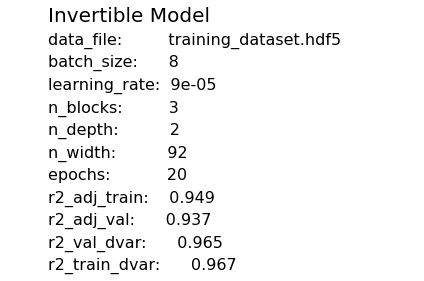

In [91]:
fig, ax = plt.subplots()

ax.annotate(xy=(1, 1),xytext=(0.1, 1),text='Invertible Model',fontsize=20)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.9),text='data_file:         ' +os.path.basename(best_config['config/datafile']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.8),text='batch_size:      ' +str(best_config['config/batch_size']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.7),text='learning_rate:  '+str(best_config['config/learning_rate']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.6),text='n_blocks:         '+str(best_config['config/n_blocks']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.5),text='n_depth:          '+str(best_config['config/n_depth']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.4),text='n_width:          '+str(best_config['config/n_width']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.3),text='epochs:           '+str(best_config['iterations_since_restore']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.2),text='r2_adj_train:    '+str(np.round(best_config['r2_adj_train'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.1),text='r2_adj_val:      '+str(np.round(best_config['r2_adj_val'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.0),text='r2_val_dvar:      '+str(np.round(best_config['r2_val_dvar'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, -0.1),text='r2_train_dvar:      '+str(np.round(best_config['r2_train_dvar'],3)),fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/invertible_model_description.jpg',bbox_inches='tight')

In [92]:
print('Invertible Model')
print('data_file:',os.path.basename(best_config['config/datafile']))
print('batch_size:',best_config['config/batch_size'])
print('learning_rate:',best_config['config/learning_rate'])
print('n_blocks:',best_config['config/n_blocks'])
print('n_depth:',best_config['config/n_depth'])
print('n_width:',best_config['config/n_width'])
print('epochs:',best_config['iterations_since_restore'])
print('r2_adj_train:',np.round(best_config['r2_adj_train'],3))
print('r2_adj_val:',np.round(best_config['r2_adj_val'],3))


Invertible Model
data_file: training_dataset.hdf5
batch_size: 8
learning_rate: 9e-05
n_blocks: 3
n_depth: 2
n_width: 92
epochs: 20
r2_adj_train: 0.949
r2_adj_val: 0.937


# Worst configs

In [93]:
df.sort_values('r2_val', ascending=True)[config_columns_changing + ['r2_val_dvar','r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val']].rename(columns=config_column_labels).head(5)

activation_function_last_layer activation_functions_inbetween  batch_size  \
17                         linear                           relu           8   
20                         linear                           relu           8   
24                         linear                           relu           8   
15                         linear                           relu           8   
13                         linear                           relu           8   

                                             datafile  epochs  learning_rate  \
17  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
20  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
24  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
15  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
13  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   

    n_blocks  n_depth  n_width  nominal_dimension  ... weight_reconstruction  \
17         3        2       92               1082  ...                   323   
20         3        2       92               1082  ...                   323   
24         3        2       92               1082  ...                   258   
15         3        2       92               1082  ...                   258   
13         3        2       92               1082  ...                   308   

   weight_x weight_y  weight_z  y_noise  r2_val_dvar  r2_adj_val   MAPE_val  \
17      142      350       291      0.1     0.957161    0.928140  57.117506   
20      138      350       339      0.1     0.902801    0.935280  78.973917   
24      142      350       339      0.1     0.965394    0.936897  50.468551   
15      142      350       291      0.1     0.863790    0.941859  76.583649   
13      146      350       291      0.1     0.863275    0.943315  80.372652   

    median_percentile_max_error_val  90_percentile_max_error_val  
17                      3610.634744                 30981.696102  
20                      5287.937578                 44639.813097  
24                      3488.180485                 28856.516704  
15                      5767.272076                 49729.194404  
13                      6038.646375                 48701.366615  

[5 rows x 24 columns]

In [94]:
df

MAE_train   MAE_val  MAPE_train   MAPE_val  MSE_train   MSE_val  \
0    0.091094  0.090977   81.005344  77.962354   0.069264  0.069728   
1    0.034939  0.036061   35.781892  29.976756   0.039345  0.050183   
2    0.095940  0.095367   93.476770  74.271681   0.085177  0.086932   
3    0.042086  0.044999   34.573050  30.989909   0.075802  0.099710   
4    0.094064  0.094039   86.098959  80.792218   0.071462  0.073490   
5    0.062604  0.065147   66.709978  46.033925   0.090173  0.113169   
6    0.063849  0.064841   60.102499  53.295053   0.081239  0.087136   
7    0.089172  0.088891   81.274109  73.009793   0.062090  0.064427   
8    0.090544  0.090967  101.994049  78.495715   0.051586  0.053383   
9    0.061868  0.063620   68.226294  48.659604   0.102365  0.121164   
10   0.092000  0.092323   94.836448  76.372772   0.080841  0.085744   
11   0.091220  0.092116   85.301888  83.074584   0.077659  0.090035   
12   0.091701  0.093298   82.568518  74.985400   0.069195  0.081233   
13   0.097439  0.097981   87.857590  80.372652   0.092867  0.105438   
14   0.089312  0.089831   99.628273  78.119117   0.054764  0.061463   
15   0.095923  0.097179   89.038959  76.583649   0.093097  0.108537   
16   0.093267  0.095660   93.424741  79.300234   0.074859  0.089000   
17   0.069141  0.071750   70.512081  57.117506   0.133434  0.162001   
18   0.090326  0.090372   89.120294  85.152049   0.057705  0.059069   
19   0.088562  0.089328   86.717780  80.755856   0.064924  0.071336   
20   0.100078  0.100777  104.808772  78.973917   0.120094  0.130136   
21   0.091873  0.093152   83.185117  82.536849   0.061100  0.070218   
22   0.090443  0.090832   97.540952  81.833977   0.053886  0.056790   
23   0.058632  0.060442   61.925030  48.739591   0.071810  0.087197   
24   0.064437  0.067640   59.938552  50.468551   0.113008  0.141971   
25   0.093896  0.094975   88.058124  79.103334   0.073307  0.079184   
26   0.059172  0.062340   57.048982  50.325553   0.078596  0.108042   

    median_percentile_max_error_train  median_percentile_max_error_val  \
0                         5736.581649                      5554.135640   
1                         2024.148787                      2036.854032   
2                         5860.916237                      5847.661044   
3                         2186.645816                      2218.290072   
4                         5949.036080                      5898.676910   
5                         3560.926554                      3468.297716   
6                         3810.353908                      3912.603974   
7                         5472.426336                      5338.182328   
8                         5743.509379                      5667.946684   
9                         3502.162886                      3445.373174   
10                        5529.819882                      5476.175379   
11                        5513.962947                      5411.750585   
12                        5557.429058                      5504.435202   
13                        6146.147668                      6038.646375   
14                        5779.983158                      5704.807709   
15                        5761.995879                      5767.272076   
16                        6087.371945                      6037.301683   
17                        3701.397712                      3610.634744   
18                        6016.766652                      5947.290797   
19                        5417.420221                      5334.668833   
20                        5357.493041                      5287.937578   
21                        5792.642009                      5707.515711   
22                        5940.448539                      5803.266723   
23                        3439.696830                      3418.295465   
24                        3518.800129                      3488.180485   
25                        5916.633961                      5977.704921   
26               

# Copy the best model to the models directory

In [95]:
best_config

MAE_train                                                   0.064437
MAE_val                                                      0.06764
MAPE_train                                                 59.938552
MAPE_val                                                   50.468551
MSE_train                                                   0.113008
                                         ...                        
config/weight_x                                                  142
config/weight_y                                                  350
config/weight_z                                                  339
config/y_noise                                                   0.1
logdir             /data/project/general/aerosolretriev/aerosol_r...
Name: 24, Length: 64, dtype: object

In [96]:
best_config["config/preprocessor_y"]

'<mllib.model.standardscaler.StandardScaler object at 0x2b06f7ea0070>'

In [97]:
best_config["config/preprocessor_x"]

'<mllib.model.minmaxscaler.AdaptiveMinMaxScaler object at 0x2b06f7e9efd0>'

In [98]:
best_model_dir = f'{best_config["logdir"]}/surrogate_model'

In [99]:
#best_model_dir = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/preprocessed_by_hand/log_P11/mmscaled_asha_2/ASHA_invertible_id/train_invertible_model_c6982_00011_11_batch_size=8,weight_reconstruction=29,weight_x=37,weight_y=89,weight_z=65_2021-04-28_12-37-48/surrogate_model'


In [100]:
best_config["logdir"]

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1/ASHA_invertible_id/train_invertible_model_79df1_00024_24_nominal_dimension=1082,weight_reconstruction=258,weight_x=142,weight_z=339_2021-08-26_01-09-19'

In [101]:
print(best_model_dir)

/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1/ASHA_invertible_id/train_invertible_model_79df1_00024_24_nominal_dimension=1082,weight_reconstruction=258,weight_x=142,weight_z=339_2021-08-26_01-09-19/surrogate_model


In [60]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1/model'

In [61]:
shutil.copytree(best_model_dir, f'{model_dir}/invertible_model')

FileExistsError: [Errno 17] File exists: '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1/model/invertible_model'

# Load history of best config

In [62]:
best_config.name

3

In [63]:
best_model_folder = best_config['trial_id']

In [64]:
best_model_folder

'79df1_00003'

In [65]:
best_config

MAE_train                                                   0.042086
MAE_val                                                     0.044999
MAPE_train                                                  34.57305
MAPE_val                                                   30.989909
MSE_train                                                   0.075802
                                         ...                        
config/weight_x                                                  146
config/weight_y                                                  350
config/weight_z                                                  330
config/y_noise                                                   0.1
logdir             /data/project/general/aerosolretriev/aerosol_r...
Name: 3, Length: 64, dtype: object

In [66]:
result_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1'

In [67]:
best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

In [68]:
best_model_hist.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id'],
      dtype='object')

# Save configurations of best model

In [69]:
best_config_df = pd.DataFrame(best_config)

In [70]:
best_config_df = best_config_df.T
best_config_df

MAE_train   MAE_val MAPE_train   MAPE_val MSE_train  MSE_val  \
3  0.042086  0.044999   34.57305  30.989909  0.075802  0.09971   

  median_percentile_max_error_train median_percentile_max_error_val  \
3                       2186.645816                     2218.290072   

  90_percentile_max_error_train 90_percentile_max_error_val  ...  \
3                  18464.757484                18348.941612  ...   

                                    config/optimizer  \
3  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
3  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y config/weight_artificial  \
3  <mllib.model.standardscaler.StandardScaler obj...                   0.0005   

  config/weight_reconstruction config/weight_x config/weight_y  \
3                          258             146             350   

  config/weight_z config/y_noise  \
3             330            0.1   

                                              logdir  
3  /data/project/general/aerosolretriev/aerosol_r...  

[1 rows x 64 columns]

In [71]:
best_config_df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id',
       'config/activation_function_last_l

In [72]:
best_config_df.to_csv(f'{model_dir}/configs.csv')

# Plot the history

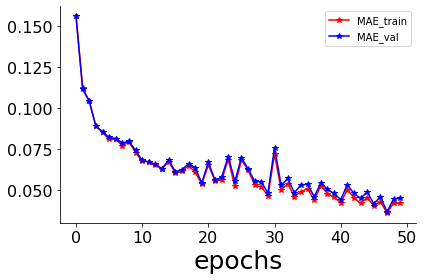

In [73]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()
fig.savefig(f'{plot_dir}/MAE_epoch.jpg',bbox_inches='tight')

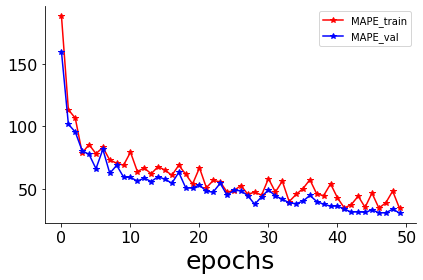

In [74]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAPE_train'],'r*-', label = 'MAPE_train')
ax.plot(best_model_hist['MAPE_val'],'b*-',label =  'MAPE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

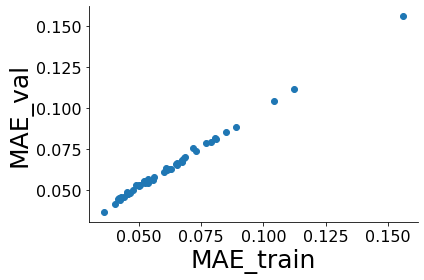

In [75]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['MAE_train'],best_model_hist['MAE_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/MAE_val_train.jpg')

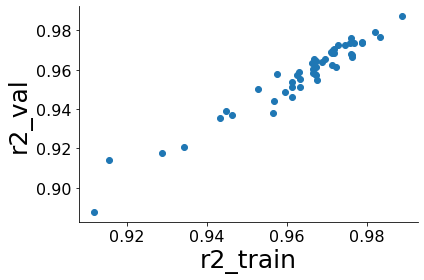

In [76]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['r2_train'],best_model_hist['r2_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('r2_train', fontsize=25)
ax.set_ylabel('r2_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_train_val.jpg')

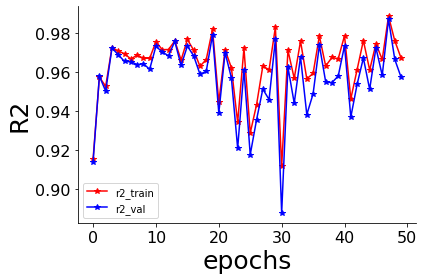

In [77]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['r2_train'],'r*-', label = 'r2_train')
ax.plot(best_model_hist['r2_val'],'b*-',label =  'r2_val')

#ax.set_xscale('log')
#ax.set_yscale('log')

#ax.set_ylim([0.97,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.set_ylabel('R2', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()
fig.savefig(f'{plot_dir}/r2_epochs.jpg')

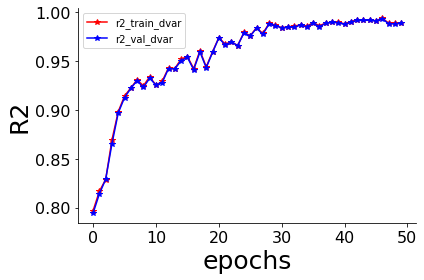

In [78]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['r2_train_dvar'],'r*-', label = 'r2_train_dvar')
ax.plot(best_model_hist['r2_val_dvar'],'b*-',label =  'r2_val_dvar')

#ax.set_xscale('log')
#ax.set_yscale('log')

#ax.set_ylim([0.97,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.set_ylabel('R2', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()
fig.savefig(f'{plot_dir}/r2_dvar_epochs.jpg')

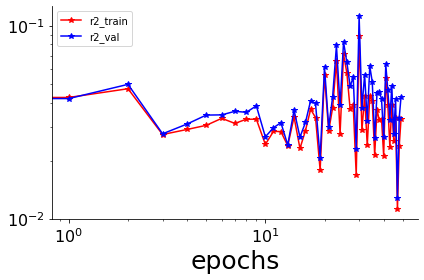

In [79]:
fig, ax = plt.subplots()

ax.plot(1-best_model_hist['r2_train'],'r*-', label = 'r2_train')
ax.plot(1-best_model_hist['r2_val'],'b*-',label =  'r2_val')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim([0.97,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

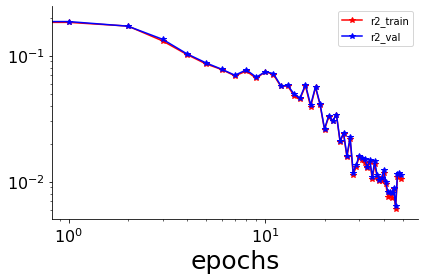

In [80]:
fig, ax = plt.subplots()

ax.plot(1-best_model_hist['r2_train_dvar'],'r*-', label = 'r2_train')
ax.plot(1-best_model_hist['r2_val_dvar'],'b*-',label =  'r2_val')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim([0.97,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

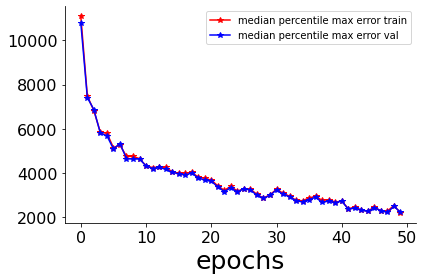

In [81]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['median_percentile_max_error_train'],'r*-', label = 'median percentile max error train')
ax.plot(best_model_hist['median_percentile_max_error_val'],'b*-',label =  'median percentile max error val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()


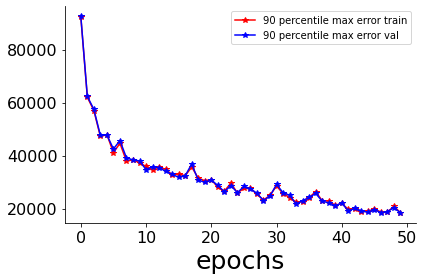

In [82]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['90_percentile_max_error_train'],'r*-', label = '90 percentile max error train')
ax.plot(best_model_hist['90_percentile_max_error_val'],'b*-',label =  '90 percentile max error val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

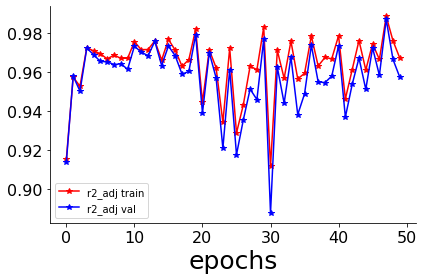

In [83]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['r2_adj_train'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

# create overview plot

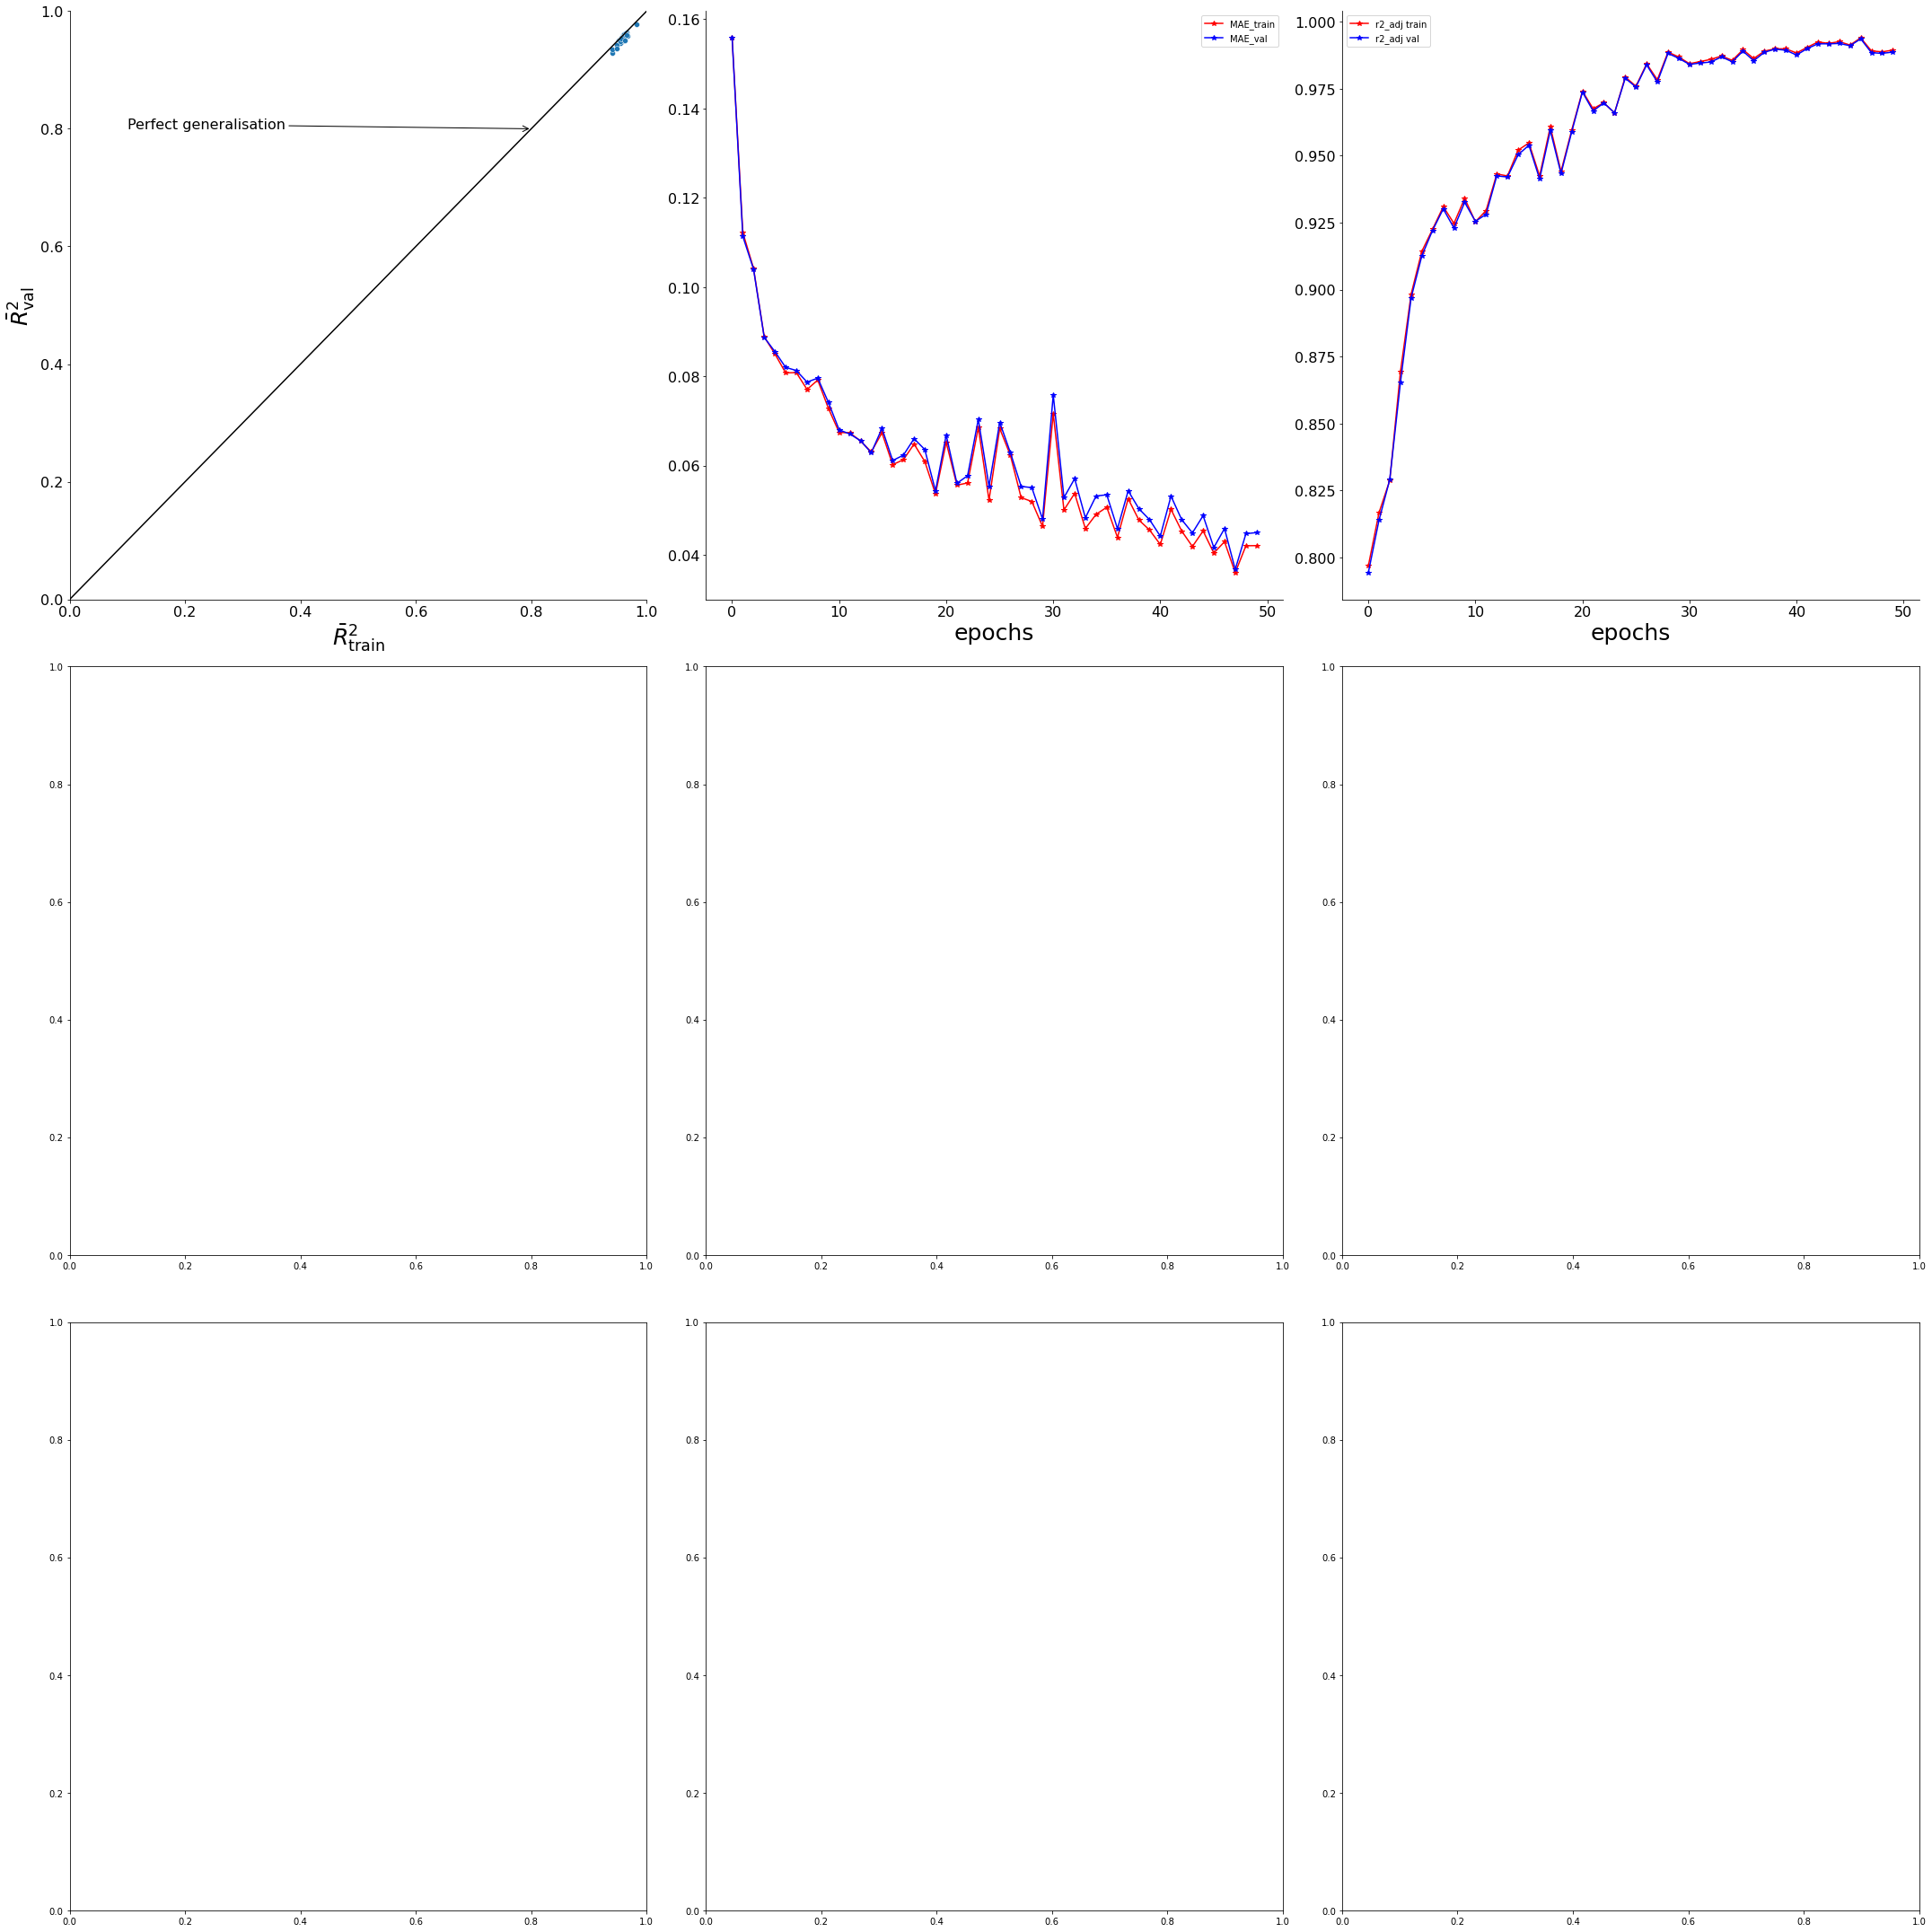

In [84]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

ax= axes[0,0]
sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
ax.annotate(xy=(0.8, 0.8),
            xytext=(0.1, 0.8),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])


ax = axes[0,1]
ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()

ax = axes[0,2]

ax.plot(best_model_hist['r2_adj_train_dvar'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val_dvar'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()




axeslist= [[1,0],[1,1],[1,2],[2,0],[2,1]]
i = 0

#plot_columns_list = ['batch_size', 'learning_rate', 'n_blocks', 'n_depth','n_width']

#for param in plot_columns_list:
#    if param == 'r2_adj_val':
#        continue
#    ax = axes[axeslist[i][0],axeslist[i][1]]
#    i = i+1
#    sns.boxplot(data=to_plot, x=param, y='r2_val_dvar', color=sns.color_palette()[0],ax=ax)

#    ax.spines['top'].set_visible(False)
#    ax.spines['right'].set_visible(False)
#    ax.set_ylim([0., 1.])
#    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
#    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
#    ax.tick_params(labelsize=14)
#    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')



#ax = axes[2,2]

#sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0],ax=ax)

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

fig.tight_layout()


fig.savefig(f'{plot_dir}/hyperparameter_scan_overview.jpg',bbox_inches='tight')

In [85]:
plot_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_AAE/version1/plots/hyperparameter_scans_new'

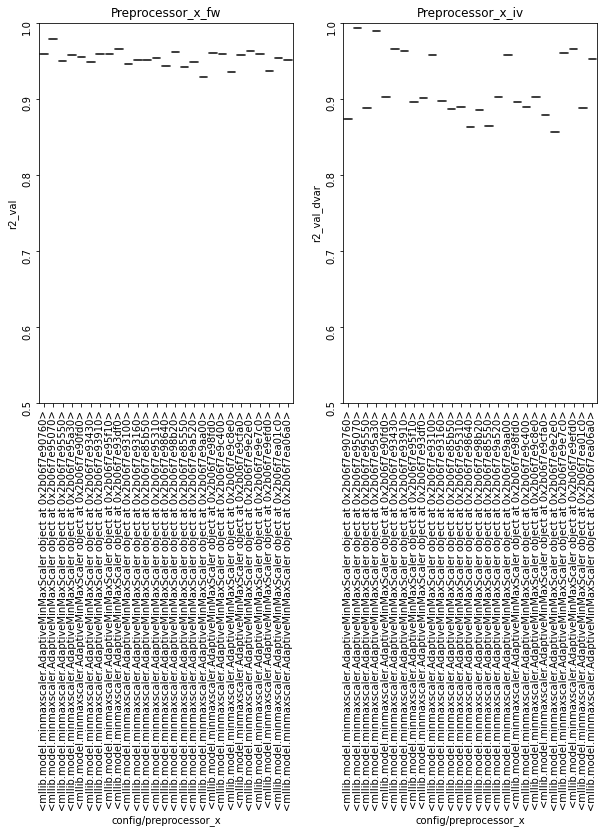

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

ax= axes[0]
sns.boxplot(data=df, x='config/preprocessor_x', y='r2_val', color=sns.color_palette()[0],ax=ax)
ax.tick_params(labelrotation=90)
#plt.xticks(rotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Preprocessor_x_fw')
ax= axes[1]
sns.boxplot(data=df, x='config/preprocessor_x', y='r2_val_dvar', color=sns.color_palette()[0],ax=ax)
ax.tick_params(labelrotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Preprocessor_x_iv')
fig.savefig(f'{plot_dir}/hyperparameter_scan_preprocessor_x.jpg',bbox_inches='tight')

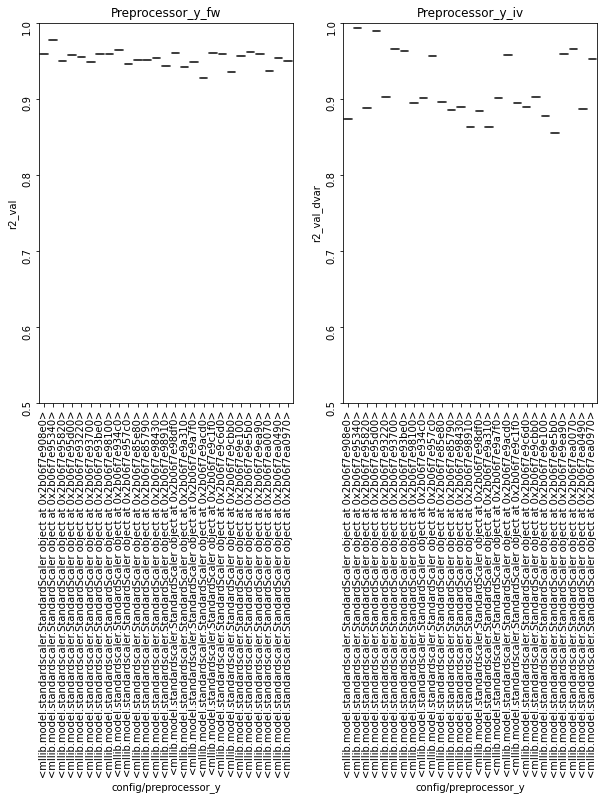

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

ax= axes[0]
sns.boxplot(data=df, x='config/preprocessor_y', y='r2_val', color=sns.color_palette()[0],ax=ax)
ax.tick_params(labelrotation=90)
#plt.xticks(rotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Preprocessor_y_fw')
ax= axes[1]
sns.boxplot(data=df, x='config/preprocessor_y', y='r2_val_dvar', color=sns.color_palette()[0],ax=ax)
ax.tick_params(labelrotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Preprocessor_y_iv')
fig.savefig(f'{plot_dir}/hyperparameter_scan_preprocessor_y.jpg',bbox_inches='tight')